# DATA620: Project 1

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

### Data

For this project, we will be working with a high school contact and friendship network dataset obtained from a previously completed research project on comparison between data collected using wearable sensors, contact diaries, and friendship surveys. We obtained the data from http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/. The dataset contains information from 327 individuals who took part in the study and includes five datasets broken into the following:

* Dynamical contact list
* Directed, weighted contact network from contact diaries
* Directed unweighted friendship network from surveys
* List of pairs of students for which the existence of Facebook link is known
* Metadata
Our two primary data sources are the 'Dynamical contact list' and the 'Metadata' datasets. We are provided with nodes of students who were given an anonymous ID for privacy, the classes where each student socialized, the time of each student interaction, and the gender of the student. The edges in the graph represent social contact between students with the weighted distance reflecting social proximity.

### Hypothetical Outcome

We would like discover if one gender is, substantially, making more interpersonal connections than another. Theoretically, we should see that males and females are as equally as likely to connect to another individual. We may find that this in that the case in our dataset.

### Loading the data

In [80]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
plt.rcParams.update({'axes.facecolor':'orange'})

In [42]:
#warnings.filterwarnings("ignore")

In [43]:
# Import data
school_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA620/main/Data/High-School_data_2013.csv',
                          sep = ' ',
                         header = None,
                         names = ["Time_sec", "StudentID1", "StudentID2", "Class1", "Class2"])


In [44]:
attribute_data = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2015/09/metadata_2013.txt',
                   sep = '\t',
                   header = None,
                   names = ["studentID", "Class", "Gender"])
attribute_data.head(5)

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F


### Transforming the Data

In [45]:
# Create Weights. Students can contact eachother multiple times in a class. Weights can capture how often the students communicate.
weighted_data = school_data.groupby(['StudentID1', 'StudentID2']).size().reset_index(name="Contacts")

# Create weights using 1/contacts to have people who are more social with eachother closer than people who hardly socialize with eachother
weighted_data["weight"] = 1 / weighted_data["Contacts"]

weighted_data.head(5)

,StudentID1,StudentID2,Contacts,weight
0,1,55,8,0.125000
1,1,63,2,0.500000
2,1,101,1,1.000000
3,1,106,4,0.250000
4,1,117,18,0.055556


In [46]:
zip_iter = zip(attribute_data['studentID'].tolist(), attribute_data['Gender'].tolist())
a_dict = dict(zip_iter)

### NetworkX Graph Object

In [47]:
g = nx.from_pandas_edgelist(weighted_data, 
                            source='StudentID1', 
                            target='StudentID2', 
                            create_using = nx.DiGraph(),
                            edge_attr = ["Contacts", "weight"]
                           ) 

In [48]:
for key,n in g.nodes.items():
    n["Gender"]=a_dict[key]

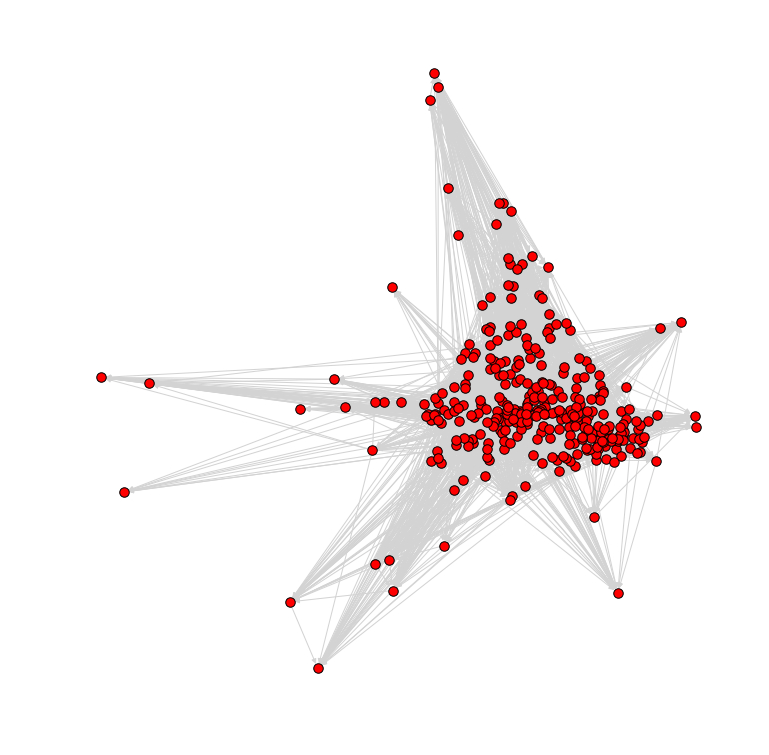

In [97]:
plt.figure(figsize = (10,10))
nx.draw(g, with_labels = False, node_size = 90, font_color = 'black', edgecolors='black',
         font_weight = 'bold', node_color='red', edge_color='lightgray', arrowsbool=True )

### Sub Graph

In [50]:
w = 0.005
sub_g = nx.subgraph(g,
                    ((source) for source, target, attr in g.edges(data=True) 
                    if attr['weight'] < w))

In [51]:
print('Filtering the student graph by all edges with a weight that is less than ' 
      + str(w) + ' generates as sub graph with ' + str(len(sub_g)) + ' nodes')

Filtering the student graph by all edges with a weight that is less than 0.005 generates as sub graph with 137 nodes


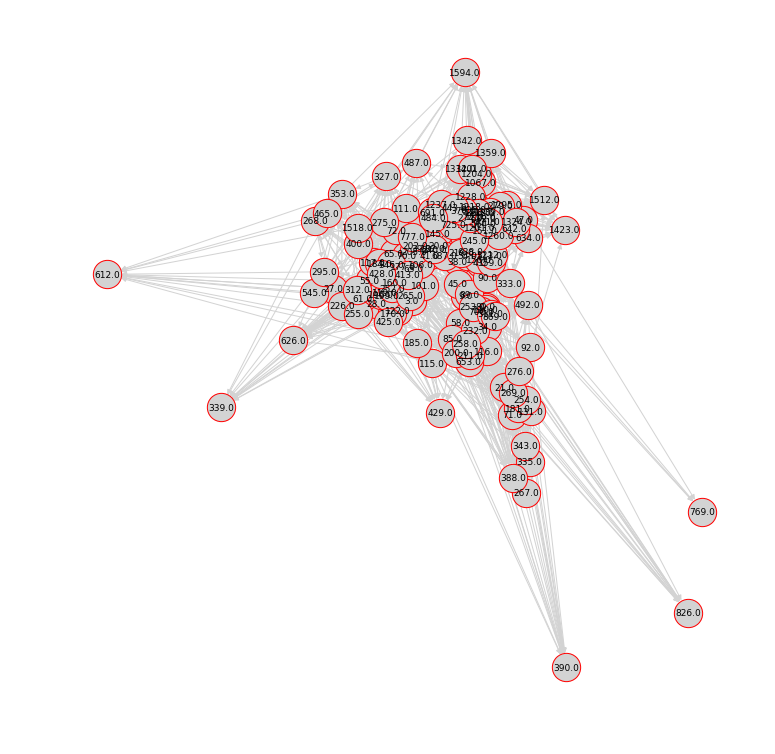

In [98]:
plt.figure(figsize = (10,10))
nx.draw(sub_g, with_labels = True, node_size = 800, font_color = 'black', font_size=9,
        edge_color='lightgray', edgecolors='red', node_color='lightgray', arrowsbool=True)

### Degree Centrality

In [53]:
deg=nx.degree(g)
deg_s = dict(sorted(dict(deg).items(), key=lambda item: item[1],reverse=True)[:10])
deg_s

{106.0: 87,
 1518.0: 84,
 1332.0: 77,
 272.0: 76,
 605.0: 72,
 1359.0: 69,
 9.0: 69,
 232.0: 68,
 376.0: 67,
 275.0: 67}

### Closeness Centrality 

In [54]:
c=nx.closeness_centrality(g)
cs = dict(sorted(c.items(), key=lambda item: item[1],reverse=True)[:10])
cs

{1518.0: 0.49436659873499256,
 1423.0: 0.46783757720007385,
 1512.0: 0.454302343872896,
 1894.0: 0.4542853218569728,
 1359.0: 0.44787348698391644,
 1594.0: 0.4468429087529987,
 1805.0: 0.44647332784677535,
 1332.0: 0.4384028361284084,
 1819.0: 0.4316036252908047,
 1828.0: 0.4271834434819243}

### Boundary Spanners

In [55]:
b=nx.betweenness_centrality(g)
bs = dict(sorted(b.items(), key=lambda item: item[1],reverse=True)[:10])
bs

{605.0: 0.014865800569258862,
 674.0: 0.014845753896991328,
 272.0: 0.011763082788901497,
 245.0: 0.010455203874467361,
 376.0: 0.00907112727440966,
 372.0: 0.00871512803596813,
 424.0: 0.007556434230106044,
 275.0: 0.007419530814581692,
 1332.0: 0.007137200130949082,
 407.0: 0.006962806277102555}

### Eigenvector Centrality

In [56]:
e = nx.eigenvector_centrality(g, max_iter=1000) 
es = dict(sorted(e.items(), key=lambda item: item[1],reverse=True)[:10])
es

{1894.0: 0.995934181862536,
 1828.0: 0.07326103247116662,
 1819.0: 0.03799368416357973,
 1870.0: 0.03531691982142628,
 1784.0: 0.005347315286971633,
 1805.0: 0.005304012227396992,
 1594.0: 0.00039260541323285557,
 1543.0: 0.00034853951983630007,
 1519.0: 0.0003422296364468425,
 1518.0: 5.0485733719803415e-05}

In [57]:
# page rank centrality

In [58]:
pr=nx.pagerank(g) 
prs = dict(sorted(pr.items(), key=lambda item: item[1],reverse=True)[:10])
prs

{1894.0: 0.093215000104072687,
 1828.0: 0.037971295334678579,
 1784.0: 0.021680839767477134,
 1819.0: 0.019965346849316612,
 991.0: 0.017845819785267301,
 1518.0: 0.017475816125924009,
 1805.0: 0.016464633081219201,
 1332.0: 0.016027894185480233,
 1870.0: 0.01468995647286038,
 1423.0: 0.013718543012471092}

### Centrality Measures Summary Table

In [59]:
df = attribute_data.copy()
df.head()

,studentID,Class,Gender
0,650,2BIO1,F
1,498,2BIO1,F
2,627,2BIO1,F
3,857,2BIO1,F
4,487,2BIO1,F


In [60]:
df['Degree'] = df['studentID'].map(dict(deg))
df['Closeness'] = df['studentID'].map(dict(c))
df['Betweenness'] = df['studentID'].map(dict(b))
df['Eigenvector'] = df['studentID'].map(dict(e))
df['PageRank'] = df['studentID'].map(dict(pr))
df.head().round(decimals=4)

,studentID,Class,Gender,Degree,Closeness,Betweenness,Eigenvector,PageRank
0,650,2BIO1,F,39.0,0.2048,0.0013,0.0,0.0026
1,498,2BIO1,F,44.0,0.2035,0.0029,0.0,0.0029
2,627,2BIO1,F,22.0,0.1862,0.0005,0.0,0.0018
3,857,2BIO1,F,24.0,0.2412,0.0015,0.0,0.0028
4,487,2BIO1,F,40.0,0.1656,0.0014,0.0,0.0013


### Centrality measures comparison 

#### Degree

In [61]:
df.groupby("Gender")["Degree"].describe().round(decimals=4)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,145.0,36.4828,14.1545,2.0,29.0,36.0,43.0,87.0
M,175.0,34.8857,13.0441,8.0,25.5,35.0,42.0,84.0
Unknown,7.0,34.4286,12.2863,18.0,27.0,35.0,41.0,52.0


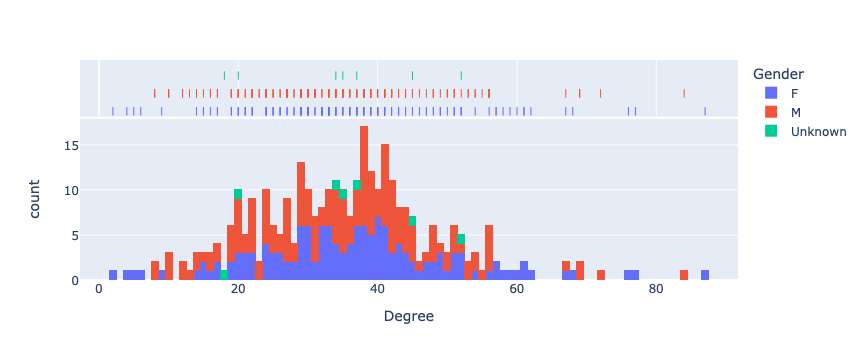

In [62]:
fig = px.histogram(df, x="Degree", color="Gender", marginal="rug",nbins=100, hover_data=df.columns)
fig.show()

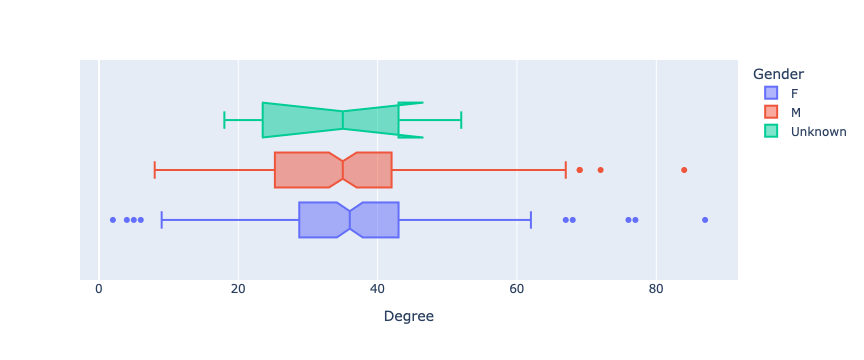

In [96]:
fig = px.box(df, x="Degree", color="Gender", notched=True)
fig.show()

In [63]:
#### Closeness

In [64]:
df.groupby("Gender")["Closeness"].describe().round(decimals=4)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,145.0,0.1574,0.1074,0.0,0.0652,0.1453,0.2412,0.4543
M,175.0,0.1824,0.1226,0.0,0.0899,0.1776,0.2676,0.4944
Unknown,7.0,0.0769,0.0900,0.0,0.0123,0.0595,0.1009,0.2525


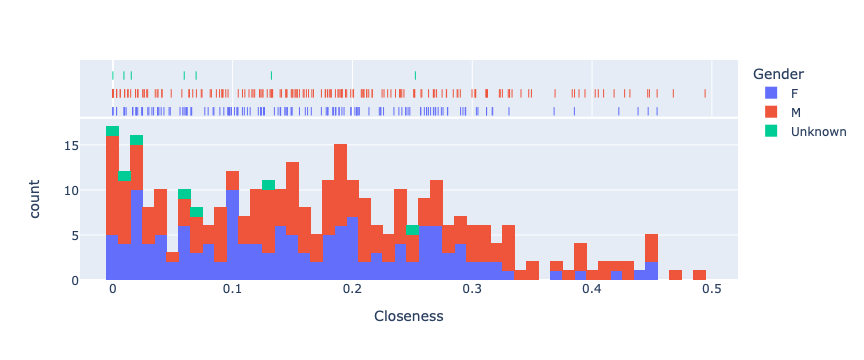

In [78]:
fig = px.histogram(df, x="Closeness", color="Gender", marginal="rug",nbins=80, hover_data=df.columns)
fig.show()

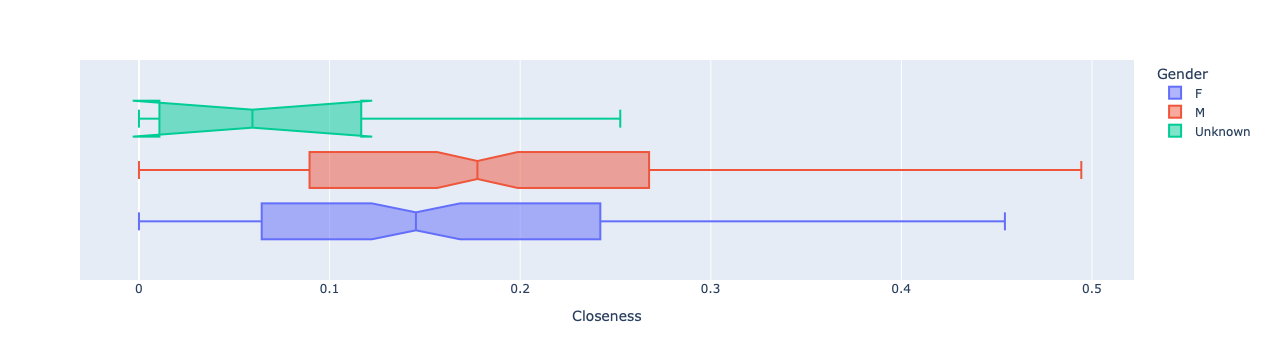

In [95]:
fig = px.box(df, x="Closeness", color="Gender", notched=True)
fig.show()

In [66]:
#### Betweenness

In [67]:
df.groupby("Gender")["Betweenness"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,145.0,0.001934,0.002294,0.0,0.000410,0.001133,0.002688,0.014846
M,175.0,0.001529,0.002007,0.0,0.000177,0.000808,0.002018,0.014866
Unknown,7.0,0.000903,0.000838,0.0,0.000339,0.000634,0.001456,0.002096


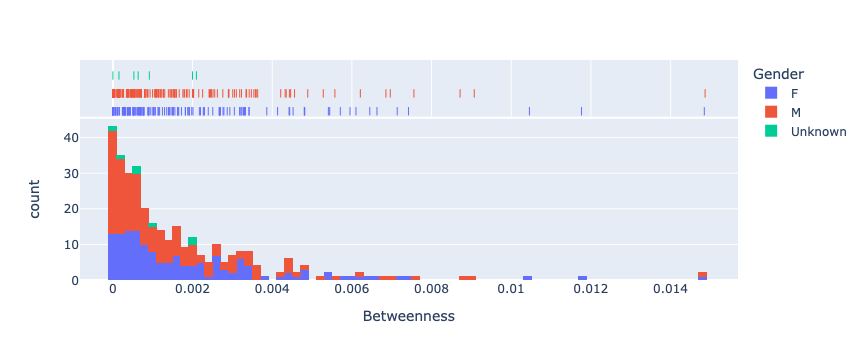

In [77]:
fig = px.histogram(df, x="Betweenness", color="Gender", marginal="rug",nbins=80, hover_data=df.columns)
fig.show()

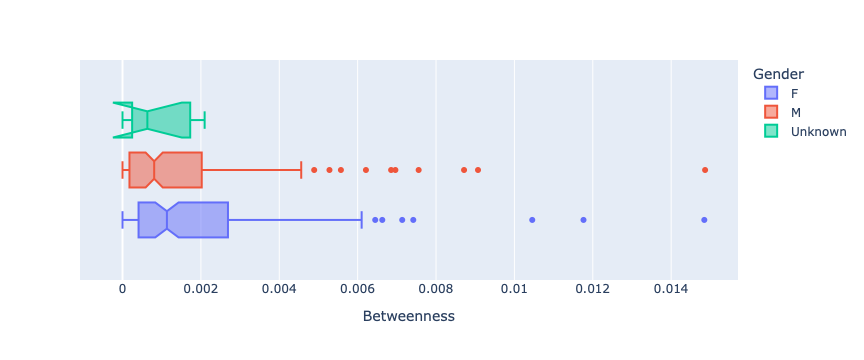

In [94]:
fig = px.box(df, x="Betweenness", color="Gender", notched=True)
fig.show()

In [69]:
#### Eigenvector

In [70]:
df.groupby("Gender")["Eigenvector"].describe().round(decimals=4)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,145.0,0.0069,0.0827,0.0,0.0,0.0,0.0,0.9959
M,175.0,0.0009,0.0068,0.0,0.0,0.0,0.0,0.0733
Unknown,7.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000


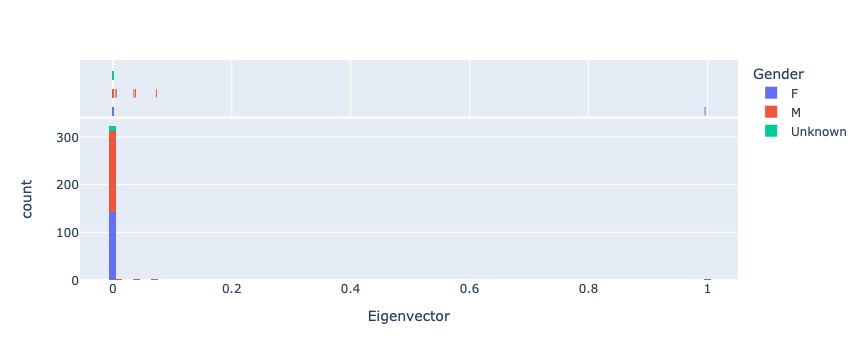

In [71]:
fig = px.histogram(df, x="Eigenvector", color="Gender", marginal="rug",nbins=100, hover_data=df.columns)
fig.show()

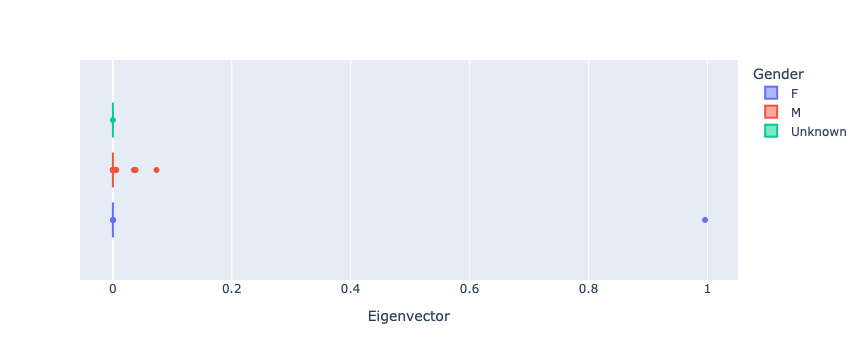

In [91]:
fig = px.box(df, x="Eigenvector", color="Gender", notched=True)
fig.show()

In [72]:
#### PageRank

In [85]:
df.groupby("Gender")["PageRank"].describe().round(decimals=4)

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,145.0,0.0030,0.0079,0.0009,0.0011,0.0015,0.0028,0.0932
M,175.0,0.0032,0.0046,0.0009,0.0011,0.0016,0.0027,0.0380
Unknown,7.0,0.0013,0.0009,0.0009,0.0009,0.0010,0.0011,0.0032


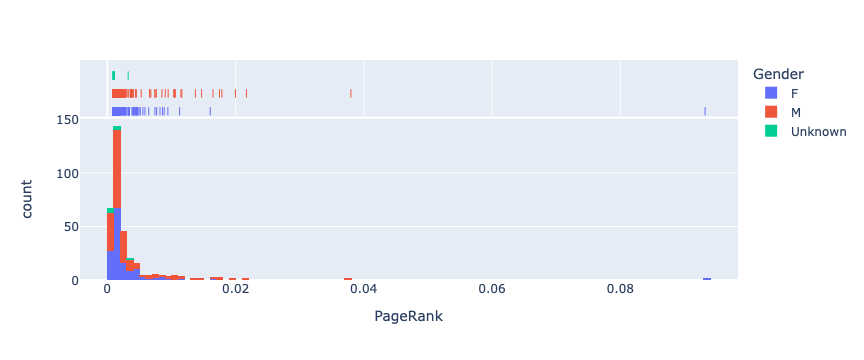

In [89]:
fig = px.histogram(df, x="PageRank", color="Gender", marginal="rug",nbins=100, hover_data=df.columns)
fig.show()

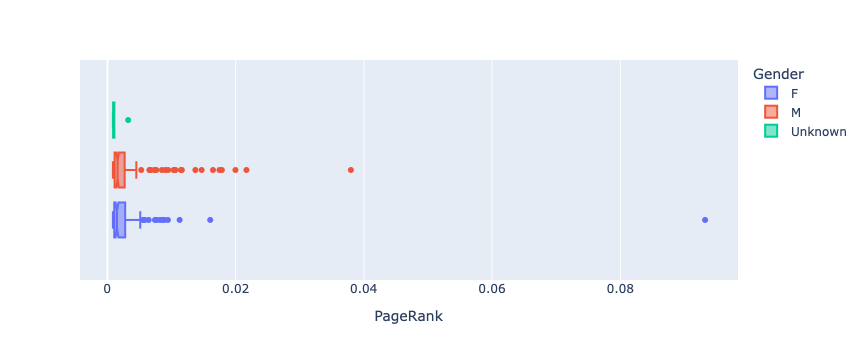

In [90]:
fig = px.box(df, x="PageRank", color="Gender", notched=True)
fig.show()

In [75]:
### 3D Exploration

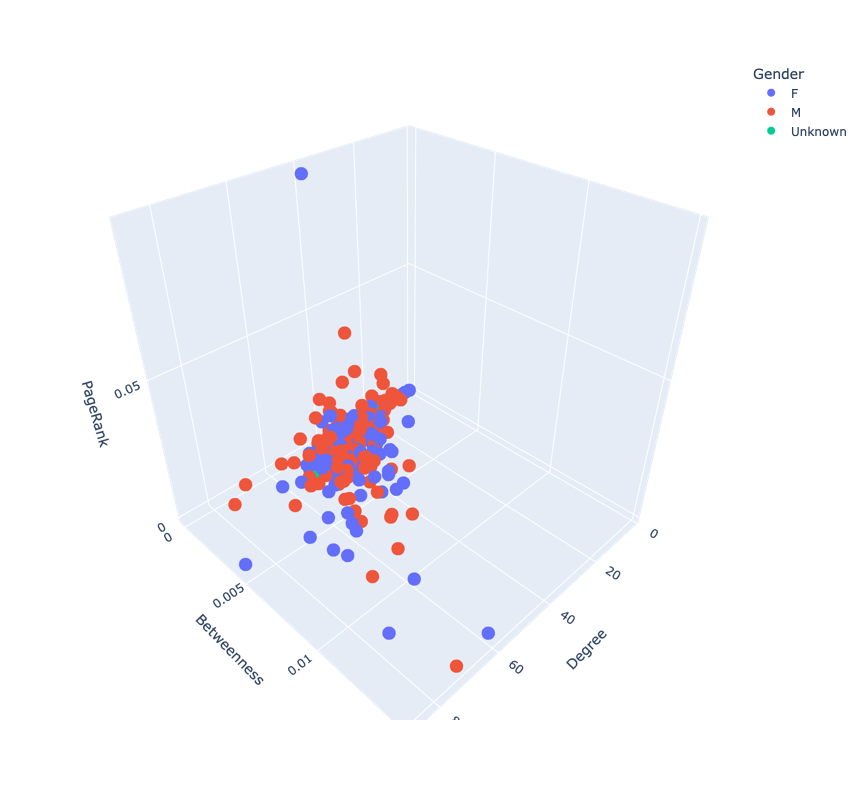

In [83]:
fig = px.scatter_3d(df, x="Degree", y="Betweenness", z="PageRank", color="Gender", 
                    hover_name="studentID", width=1100, height=800)
fig.show()

### T-Test

### Conclusion